# Линейная регрессия на реальных данных

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
df = pd.read_csv('EDA_demo_data/karmakuly_processed.csv', parse_dates=['Date'], index_col='Date')
df

,tcc,lcc,wdir,wvel,wgust,prec,tg,ta,rh,td,ps,psl
Date,,,,,,,,,,,,
1966-12-31 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1966-12-31 21:00:00,10.0,10.0,180.0,12.0,NaN,NaN,NaN,-7.3,97.0,-8.0,1012.7,1014.8
1967-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1967-01-01 03:00:00,10.0,10.0,180.0,9.0,NaN,0.0,NaN,-7.6,90.0,-9.0,1010.2,1012.3
1967-01-01 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
y = df['ta']
X = df.drop('ta', axis=1)

model = LinearRegression()
model.fit(X, y)

# print ('df shape with nans: ', df.shape)
# df = df.drop (['tg'], axis=1)
# #df = df.drop (['tg', 'td', 'psl'], axis=1)

# df = df.dropna()
# print ('df shape without nans: ', df.shape)

df shape with nans:  (163632, 12)
df shape without nans:  (128354, 9)


LinearRegression()

corr coeff is  0.4869372061595379
corr coeff^2 is  0.2371078427424563
R2 is  0.23710784274245622
RMSE is  8.406448883604082


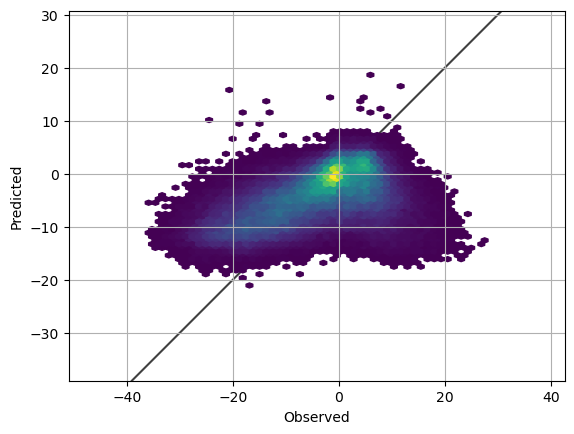

In [21]:
y_pred = model.predict(X)

plt.figure()
plt.scatter(y, y_pred)
#plt.hexbin (y, y_pred, mincnt=1, gridsize=50)

plt.axis('equal')
ax = plt.gca()
lims = [
       np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
       np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
       ]
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlim(lims)
plt.ylim(lims)
plt.grid()
plt.xlabel('Observed')
plt.ylabel('Predicted')

r = np.corrcoef(y_pred, y)[0,1]
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print ('corr coeff is ', r)
print ('corr coeff^2 is ', r**2)

print ('R2 is ', r2)
print ('RMSE is ', np.sqrt (mse))


In [16]:
coefs = pd.DataFrame(model.coef_, X.columns, columns=['coef']) 
display(coefs)

,coef
tcc,0.319705
lcc,0.166376
wdir,0.009562
wvel,0.021371
wgust,-0.135978
prec,0.229345
rh,0.039602
ps,49.798223
psl,-49.682955
